## Activation functions

In [9]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import activations

In [15]:
PLOTS = "plots"

def save_fig(filename, folder=PLOTS):
    plt.savefig(os.path.join(folder, filename))

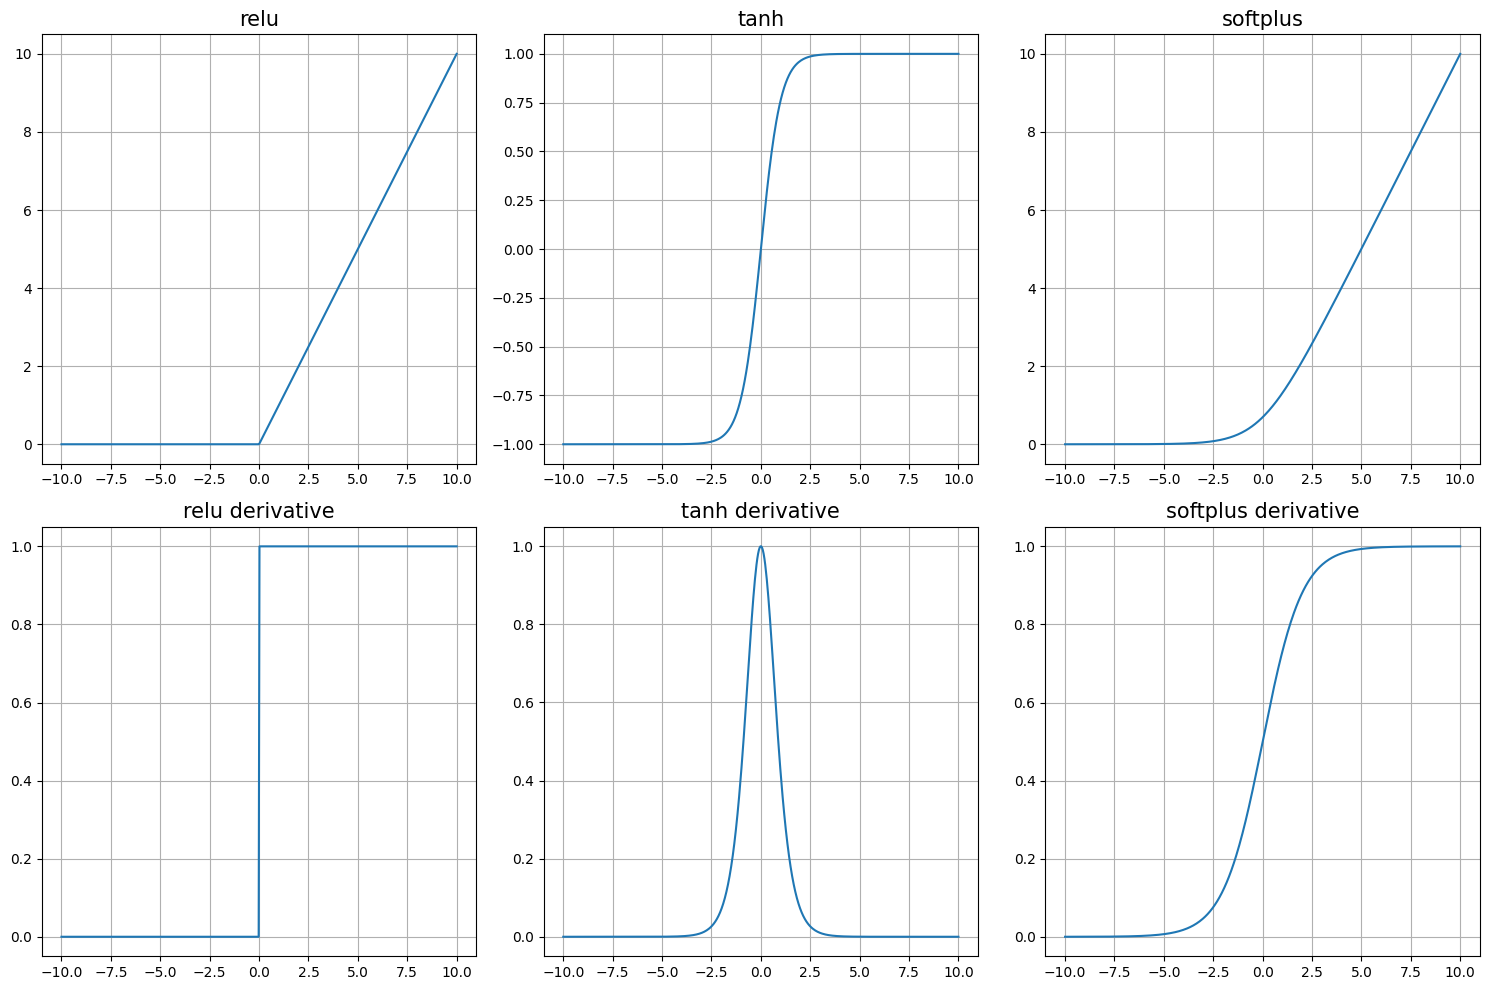

In [14]:
# Create a list of the desired activation functions
activations_list = ['relu', 'tanh', 'softplus']

# Generate a set of x values from -10 to 10
x = np.linspace(-10, 10, 500)

fig, axs = plt.subplots(2, len(activations_list), figsize=(15, 10))  

# For each activation function, calculate the corresponding y values
# and plot the function and its derivative
for i, activation_name in enumerate(activations_list):
    x_tensor = tf.Variable(x, dtype=tf.float32)
    with tf.GradientTape() as tape:
        tape.watch(x_tensor)
        y = activations.get(activation_name)(x_tensor)

    gradient = tape.gradient(y, x_tensor).numpy()  # Compute the gradient

    axs[0, i].plot(x, y.numpy())
    axs[0, i].set_title(f'{activation_name}', fontsize=15)
    axs[0, i].grid(True)
    
    axs[1, i].plot(x, gradient)
    axs[1, i].set_title(f'{activation_name} derivative', fontsize=15)
    axs[1, i].grid(True)

plt.savefig('activation_functions.png')
plt.tight_layout()
plt.show()

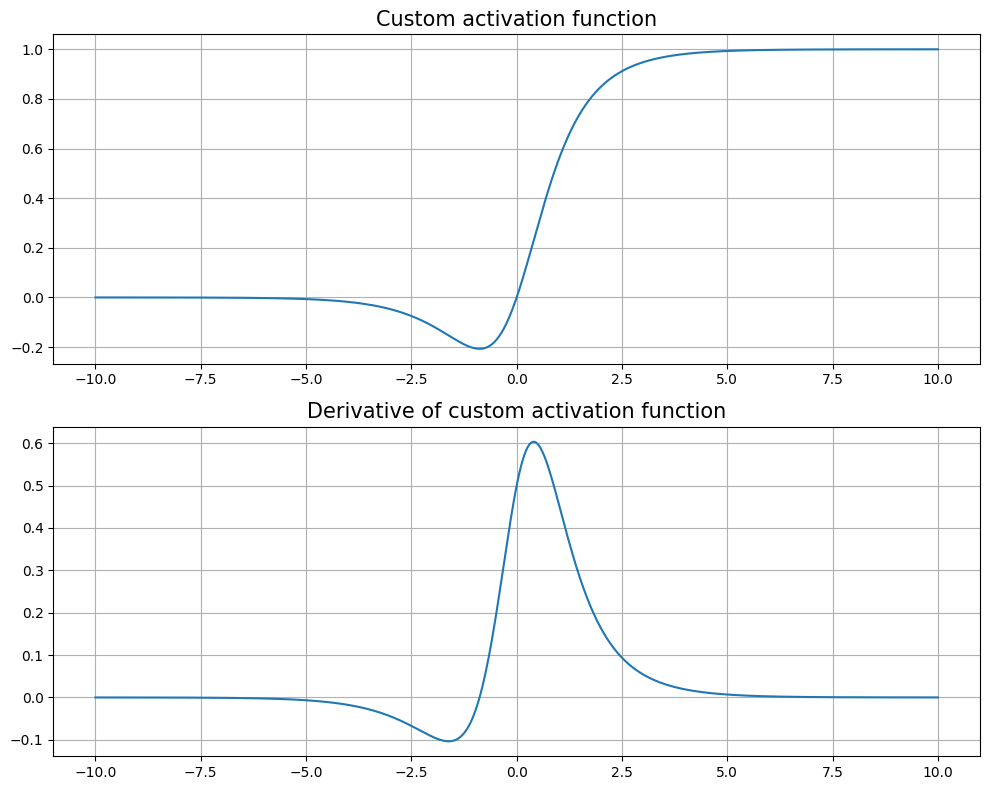

In [ ]:
# Placeholder weights
Wk_f = 1.0
Wk_g = 1.0

# Input values
x = np.linspace(-10, 10, 500)
x_tensor = tf.Variable(x, dtype=tf.float32)

# Custom activation function
with tf.GradientTape() as tape:
    tape.watch(x_tensor)
    y = tf.tanh(Wk_f * x_tensor) * tf.sigmoid(Wk_g * x_tensor)

# Compute derivative
gradient = tape.gradient(y, x_tensor).numpy()

# Plot function and its derivative
fig, axs = plt.subplots(2, 1, figsize=(10, 8))  

axs[0].plot(x, y.numpy())
axs[0].set_title('Custom activation function', fontsize=15)
axs[0].grid(True)

axs[1].plot(x, gradient)
axs[1].set_title('Derivative of custom activation function', fontsize=15)
axs[1].grid(True)

plt.tight_layout()
plt.show()

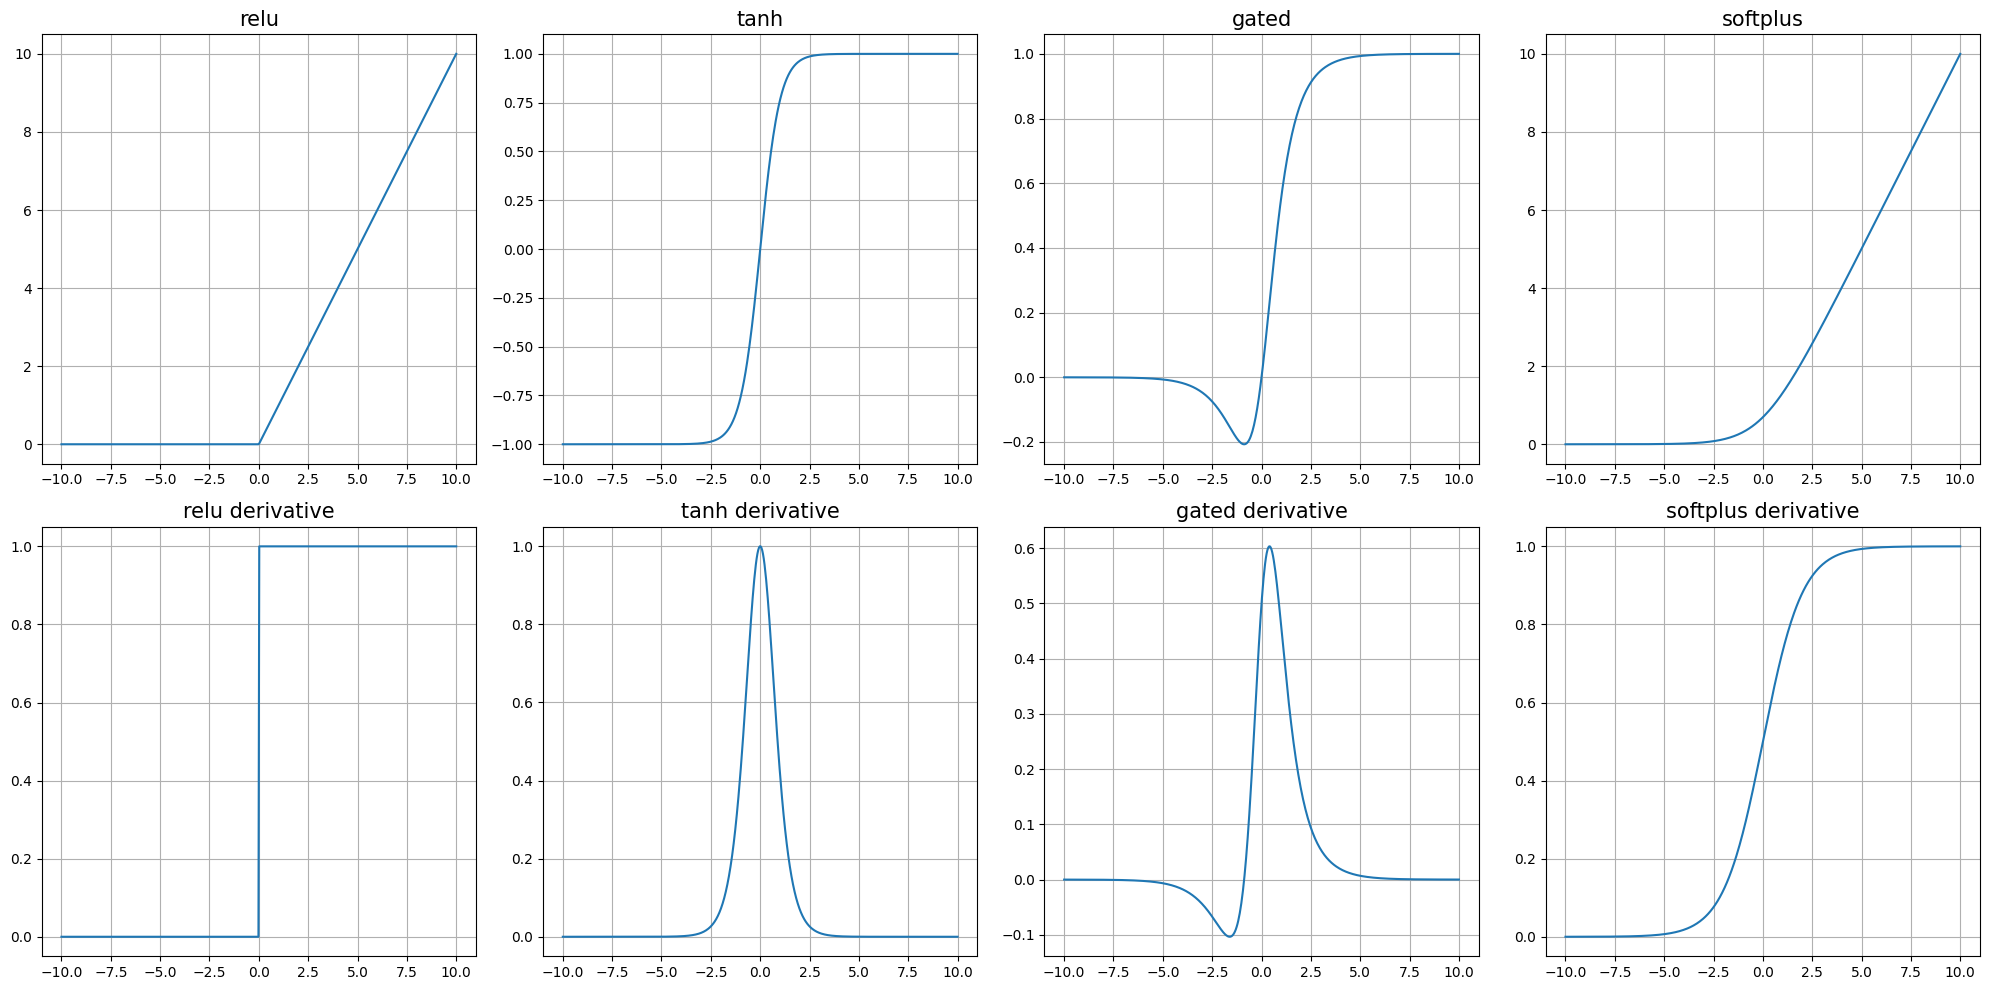

In [7]:
# Placeholder weights
Wk_f = 1.0
Wk_g = 1.0

# Create a list of the desired activation functions
activations_list = ['relu', 'tanh', 'gated', 'softplus']

# Generate a set of x values from -10 to 10
x = np.linspace(-10, 10, 500)

fig, axs = plt.subplots(2, len(activations_list), figsize=(20, 10))  

# For each activation function, calculate the corresponding y values
# and plot the function and its derivative
for i, activation_name in enumerate(activations_list):
    x_tensor = tf.Variable(x, dtype=tf.float32)
    with tf.GradientTape() as tape:
        tape.watch(x_tensor)
        if activation_name == 'gated':
            y = tf.tanh(Wk_f * x_tensor) * tf.sigmoid(Wk_g * x_tensor)
        else:
            y = activations.get(activation_name)(x_tensor)

    gradient = tape.gradient(y, x_tensor).numpy()  # Compute the gradient

    axs[0, i].plot(x, y.numpy())
    axs[0, i].set_title(f'{activation_name}', fontsize=15)
    axs[0, i].grid(True)
    
    axs[1, i].plot(x, gradient)
    axs[1, i].set_title(f'{activation_name} derivative', fontsize=15)
    axs[1, i].grid(True)

plt.tight_layout()
plt.show()